In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import csv
import pickle
import pandas as pd
from pyblock2.driver.core import DMRGDriver, SymmetryTypes, MPOAlgorithmTypes
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from ast import literal_eval

# Importing CSV Files for different $\theta$s and Converting them to .pkl

In [5]:
import sys
sys.path.append('../')
import os

In [6]:
current_file = os.path.abspath(os.path.dirname(os.getcwd()))

In [7]:
# Theta_zero
csv_filename1 = os.path.join(current_file, 'AHM_Data_Codes\\theta0\\theta0_AHMDmrg_data.csv')
df1 = pd.read_csv(csv_filename1)
df1.to_pickle('theta0.pkl')

In [8]:
# Theta_Pi/4
csv_filename2 = os.path.join(current_file, 'AHM_Data_Codes\\theta_Piby4\\theta_PiByfour_AHMDmrg_data.csv')
df2 = pd.read_csv(csv_filename2)
df2.to_pickle('thetaPiby4.pkl')

In [9]:
# Theta_Pi/2
csv_filename3 = os.path.join(current_file, 'AHM_Data_Codes\\theta_Piby2\\theta_PiBytwo_AHMDmrg_data.csv')
df3 = pd.read_csv(csv_filename3)
df3.to_pickle('thetaPiby2.pkl')

In [10]:
# Theta_3Pi/4
csv_filename4 = os.path.join(current_file, 'AHM_Data_Codes\\theta_3Piby4\\theta_threePiByfour_AHMDmrg_data.csv')
df4 = pd.read_csv(csv_filename4)
df4.to_pickle('theta3Piby4.pkl')

In [11]:
# Theta_Pi
csv_filename5 = os.path.join(current_file, 'AHM_Data_Codes\\theta_Pi\\theta_Pi_AHMDmrg_data.csv')
df5 = pd.read_csv(csv_filename5)
df5.to_pickle('thetaPi.pkl')

# Reading Pickle files

In [12]:
df1 = pd.read_pickle('theta0.pkl')

In [13]:
df2 = pd.read_pickle('thetaPiby4.pkl')

In [14]:
df3 = pd.read_pickle('thetaPiby2.pkl')

In [15]:
df4 = pd.read_pickle('theta3Piby4.pkl')

In [16]:
df5 = pd.read_pickle('thetaPi.pkl')

# Defining Parameters of the Hamiltonian

In [17]:
params={}
params['df_list'] = [df1, df2, df3, df4, df5]
params['L'] = 10
params['t_list'] = np.arange(0, 2.1, 0.1).round(1)
params['theta_list'] = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
params['U'] = 1

# Retrieving Data Scripts

In [24]:
def convert_stringlist_to_float_list(string):
    '''
    Remove the square brackets and split by spaces
    '''
    float_list = list(map(float, string.strip('[]').split()))
    return float_list

def get_data_by_conditions(df, conditions, columns):
    '''
    For pickle files
    '''
    condition = pd.Series([True] * len(df)) 
    for key, value in conditions.items():
        condition &= df[key] == value
    filtered_df = df[condition]
    return filtered_df[columns] if not filtered_df.empty else None


##### Some Minor Testing of Functions

In [19]:
def get_data_by_conditions(df, conditions, columns):
    """
    Get specific data from the CSV file based on dynamically generated conditions.

    Parameters:
    - df: Object of the filename that has to be accessed
    - conditions (dict): A dictionary where keys are column names and values are the conditions to filter by.
    - columns (list): A list of column names to return data from.

    Returns:
    - DataFrame containing the filtered data for the specified columns.
    """    
    condition = pd.Series([True] * len(df)) 
    for key, value in conditions.items():
        condition &= df[key] == value
    filtered_df = df[condition]
    return filtered_df[columns] if not filtered_df.empty else None

# Example usage:
conditions = {'L': 10, 't': 0.3} 
columns = ['Entropy']
result = get_data_by_conditions(df1, conditions, columns)
# print((result.iloc[0]))
print(result.values[0])
# float_list = convert_stringlist_to_float_list(result.values[0][0])
# print(float_list[0])
k = eval(result.values[0])
print(k)
# print(type(k))

['[0.73128517 0.85625298 0.90595052 0.93005416 0.93745916 0.9300543\n 0.90595081 0.85625333 0.73128542]']


SyntaxError: source code string cannot contain null bytes (<string>)

In [20]:
import pandas as pd

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Save the DataFrame to a pickle file
df.to_pickle('my_dataframe.pkl')

In [21]:
def get_data_by_conditions(df, conditions, columns):
    condition = pd.Series([True] * len(df)) 
    for key, value in conditions.items():
        condition &= df[key] == value
    filtered_df = df[condition]
    return filtered_df[columns] if not filtered_df.empty else None

conditions = {'L': 10, 't': 0.5} 
entropy = ['Entropy']
result = get_data_by_conditions(df1, conditions, entropy)
print(type(result.values))
print(result.values[0][0])
print(convert_stringlist_to_float_list(result.values[0][0]))

<class 'numpy.ndarray'>
[0.88373012 1.05137198 1.10326237 1.12727989 1.13469689 1.12727996
 1.10326249 1.05137211 0.88373021]
[0.88373012, 1.05137198, 1.10326237, 1.12727989, 1.13469689, 1.12727996, 1.10326249, 1.05137211, 0.88373021]


In [159]:
conditions = {'L': params['L'], 't': 0.3} 
keywords = ['GndEigenval', 'FirstExcitedEigenval']
result = get_data_by_conditions(df1, conditions, keywords)
print(result)
print(result.values[0][1])

   GndEigenval  FirstExcitedEigenval
3    -2.755692             -2.493139
-2.493139382951964


In [142]:
conditions = {'L': params['L'], 't': 0.5} 
keywords = ['GndEigenval', 'FirstExcitedEigenval']
result = get_data_by_conditions(params['df_list'][1], conditions, keywords)
print(result)
print(result.values[0][1])

   GndEigenval  FirstExcitedEigenval
5    -5.688743             -5.432495
-5.432494795752491


In [121]:
conditions = {'L': 10, 't': 0.5} 
eigenvec = ['GndEigenvec']
result = get_data_by_conditions(df1, conditions, eigenvec)
print(type(result.values))
print(type(result.values[0][0]))

<class 'numpy.ndarray'>
<class 'str'>


# First Excitation Gap as a Function of J

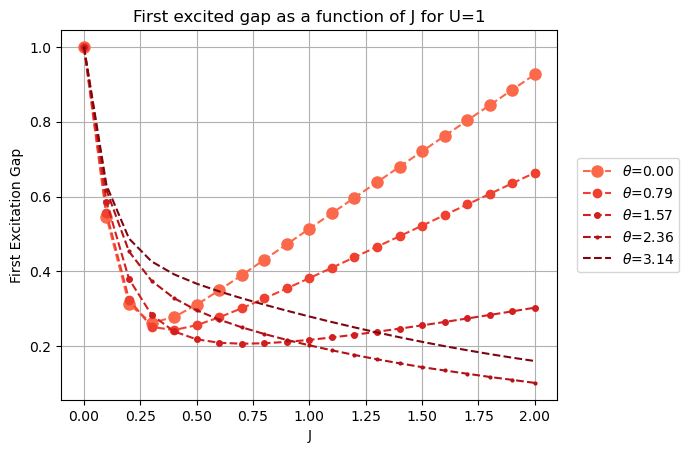

In [43]:
params['t_list'] = np.arange(0, 2.1, 0.1).round(1)
colors1 = plt.cm.Reds(np.linspace(0.5, 0.95, len(params['theta_list'])))
mss = 8
for i, df in enumerate(params['df_list']):
    gap = []
    for t in params['t_list']:
        params['t'] = t
        conditions = {'t': t} 
        keywords = ['GndEigenval', 'FirstExcitedEigenval']
        result = get_data_by_conditions(df, conditions, keywords)
        gnd_energy  = result.values[0][1]
        fexcited_energy = result.values[0][0]
        energy_gap = fexcited_energy - gnd_energy
        gap.append(np.abs(energy_gap))
    plt.plot(params['t_list'], gap, "--o", label=f'$θ$={params['theta_list'][i]:.2f}', color = colors1[i], ms=mss)
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    mss-=2

plt.xlabel('J')
plt.ylabel('First Excitation Gap')
U = params['U']
plt.title(f'First excited gap as a function of J for U={U}')
plt.grid(True)
plt.show()

# Bipartite Entanglement Entropy as a Function of J

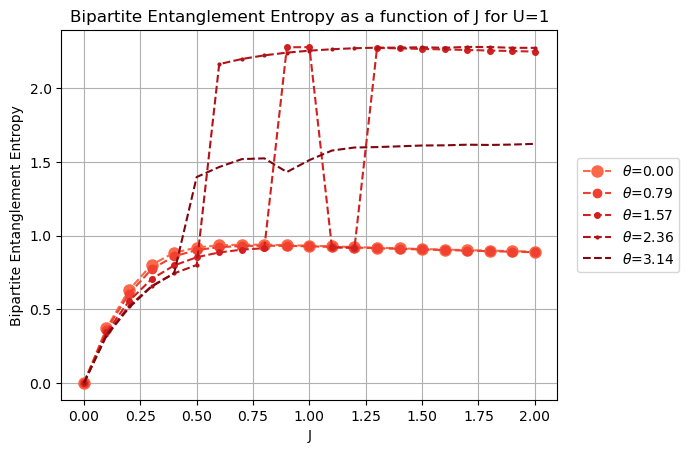

In [44]:
params['t_list'] = np.arange(0, 2.1, 0.1).round(1)
colors1 = plt.cm.Reds(np.linspace(0.5, 0.95, len(params['theta_list'])))
mss = 8
for i, df in enumerate(params['df_list']):
    entropy_list = []
    for t in params['t_list']:
        params['t'] = t
        conditions = {'t': t} 
        keywords = ['Entropy']
        result = get_data_by_conditions(df, conditions, keywords)
        entropy = convert_stringlist_to_float_list(result.values[0][0])
        entropy_list.append(entropy[0])
    plt.plot(params['t_list'], entropy_list, "--o", label=f'$θ$={params['theta_list'][i]:.2f}', color = colors1[i], ms=mss)
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
    mss-=2

plt.xlabel('J')
plt.ylabel('Bipartite Entanglement Entropy')
U = params['U']
plt.title(f'Bipartite Entanglement Entropy as a function of J for U={U}')
plt.grid(True)
plt.show()

# Scaling Laws: Volume and Area Laws

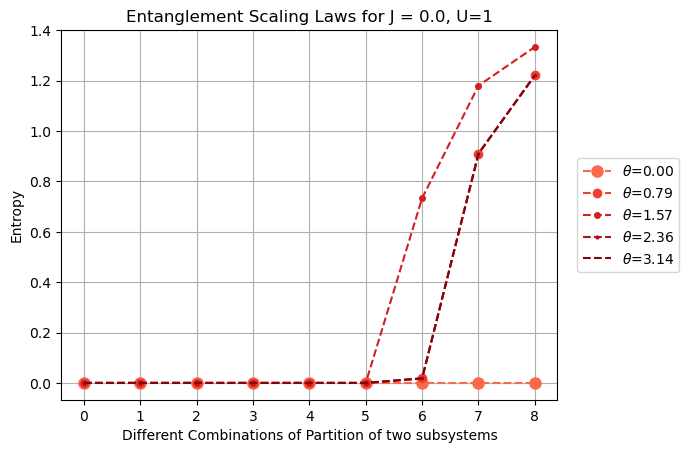

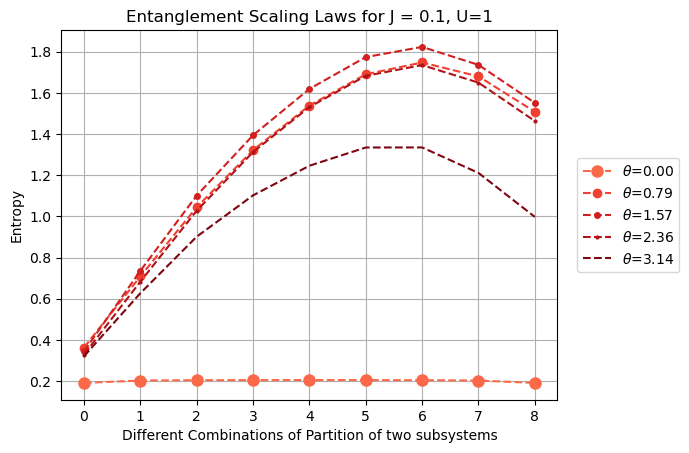

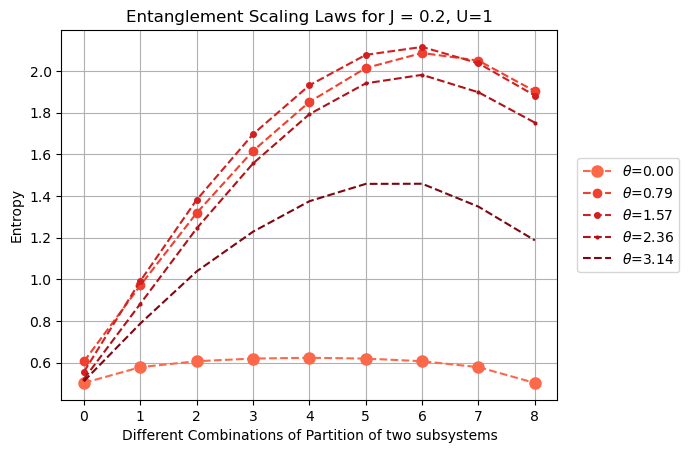

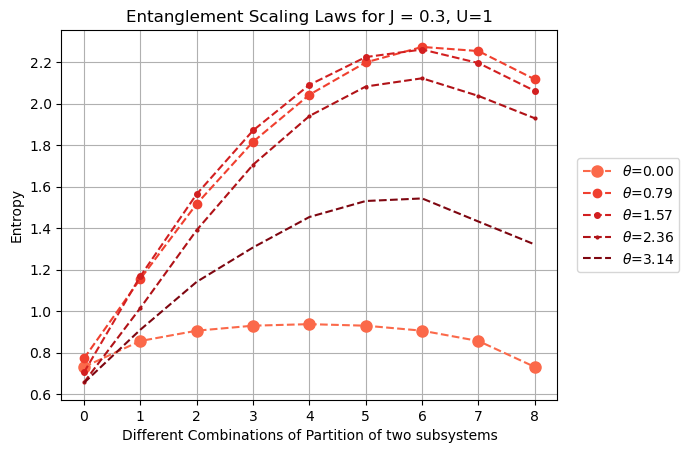

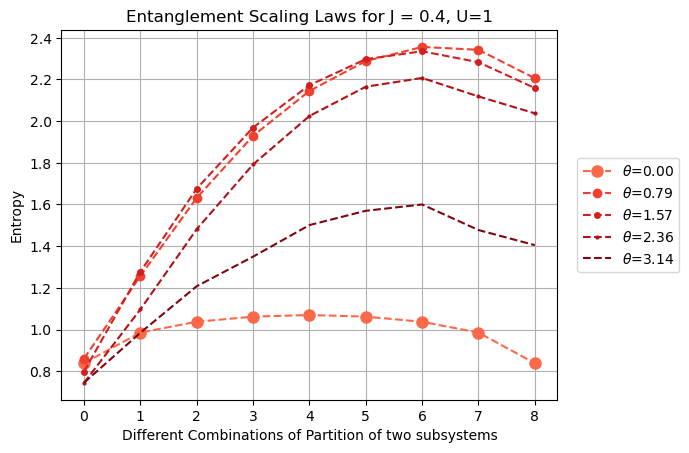

In [22]:
params['t_list_scalelaws'] = np.arange(0, 0.5, 0.1).round(1)
colors1 = plt.cm.Reds(np.linspace(0.5, 0.95, len(params['theta_list'])))
for t in params['t_list_scalelaws']:
    mss = 8
    params['t'] = t
    conditions = {'t': t} 
    keywords = ['Entropy']
    for i, df in enumerate(params['df_list']):
        result = get_data_by_conditions(df, conditions, keywords)
        entropy = convert_stringlist_to_float_list(result.values[0][0])
        plt.plot(list(range(len(entropy))), entropy, "--o", label=f'$θ$={params['theta_list'][i]:.2f}', color = colors1[i], ms=mss)
        plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
        mss-=2
    plt.xlabel('Different Combinations of Partition of two subsystems')
    plt.ylabel('Entropy')
    U = params['U']
    plt.title(f'Entanglement Scaling Laws for J = {t}, U={U}')
    plt.grid(True)
    plt.show() 